<a href="https://colab.research.google.com/github/eunhaday/AIFFEL_quest_cr/blob/master/MainQuest/QUEST04/1004_mq04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATAthon -  올림픽기록 분석

- 배경
    - 대상기간 : 1896년 아테네올림픽 ~ 2016년 리우 올림픽까지
    - 현대 올림픽에 대한 역사적인 데이터 세트
    - 1992년까지 동계 올림픽과 하계 올림픽은 같은 해에 개최됨(1896 ~ 1992)

- 주제
    - 데이터셋을 통해서 올림픽 종목, 메달에 대한 자유로운 분석을 통해 결과를 추론
    - 여성, 다양한 국가, 다양한 스포츠 및 종목의 참여와 성과에 대한 질문을 포함해
      올림픽이 시간이 지남에 따라 어떻게 발전해왔는지에 대해서 분석
- 데이터셋
    - athlete_events.csv (선수이벤트)
        - 271116개의 행과 15개 열로 구성
        - 각 행은 개별 올림픽 종목에 출전하는 개별 선수에 해당  
               
    - noc_regions.csv ()
        - NOC(국가 올림픽 위원회 3글자 코드)의 상세정보
    ![image.png](attachment:image.png)
               
- 데이터 링크
    https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results/data?select=noc_regions.csv
    
** 최종주제 : 다음 올림픽을 대비하여, 저조한 성과를 보이는 종목을 파악하고, 보완방법 검토

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이타셋 변수 참조

   - 원본 : athlete_events, noc_region
   - 수정 : df, df1
   - 머지 : df_mg
   - 한국자료 : df_kor

# 1. lib import 및 csv파일 내용확인

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv


# 데이터 불러오기
noc_region = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/noc_regions.csv')   #noc_regions.csv()
athlete_events = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/athlete_events.csv')  #athlete_events.csv (선수이벤트)

In [ ]:
#csv head정보 (noc_region: 원천정보)
noc_region.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
#csv head정보 (athlete_events : 원천정보)
athlete_events.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
athlete_events.info()  #athlete_events.csv 컬럼정보
noc_region.info()  #noc_region.csv 컬럼정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0 

# 1-1.원천자료로 중복, 보정 및 Merge, 결측치처리

 - athlete_events: 중복처리, 결측치처리, 이상치확인
    - 컬럼추가(medal-> medal그룹, medal수로 생성),
 - noc_region : 결측치처리, 값보정(NOC 코드가 잘못등록된 자료수정 SIN -> SGP)

In [ ]:
#athlete_events 데이타중복건 확인
athlete_events[athlete_events.duplicated()]   #1385건

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269995,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


# -> 중복자료 삭제처리(athlete_events)

In [ ]:
df = pd.DataFrame(athlete_events)
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
len(df)

269731

In [ ]:
#csv 파일항목 수치형 변수기준으로 count~max값까지 출력정보
df.describe()

,ID,Age,Height,Weight,Year
count,269731.000000,260416.000000,210917.000000,208204.000000,269731.000000
mean,68264.949591,25.454776,175.338953,70.701778,1978.623073
std,39026.253843,6.163869,10.518507,14.349027,29.752055
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34655.500000,21.000000,168.000000,60.000000,1960.000000
50%,68233.000000,24.000000,175.000000,70.000000,1988.000000
75%,102111.000000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


# -> NOC 코드가 잘못등록된 noc_region 자료 수정

In [ ]:
#noc_regions 파일의 결측치가 있는 대상 데이타의 건수확인
df1 = pd.DataFrame(noc_region)
df1.isnull().sum() #전체 결측치가 있는 행갯수

,0
NOC,0
region,3
notes,209


In [ ]:
# athlete_events.NOC - noc_region.NOC => 즉 athlete_events 에만 있는자료, 이말은 noc_region 코드에는 없는자료임
set(athlete_events['NOC']) - set(noc_region['NOC'])

{'SGP'}

In [ ]:
set(noc_region['NOC']) - set(athlete_events['NOC'])

{'SIN'}

# -> athlete_events.NOC 에만 있는 자료(SGP), noc_region.NOC 에만(SIN) 존재

  - 국가코드3자리 : noc_region.NOC 틀린자료 SIN -> SGP로 변경함
  
  https://ko.wikipedia.org/wiki/%EA%B5%AD%EA%B0%80%EB%B3%84_%EA%B5%AD%EA%B0%80_%EC%BD%94%EB%93%9C_%EB%AA%A9%EB%A1%9D

In [ ]:
df1['NOC'].replace({'SIN': 'SGP'}, inplace=True)

<ipython-input-96-5c3ef24a2230>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['NOC'].replace({'SIN': 'SGP'}, inplace=True)


In [ ]:
len(df[df['NOC'] == 'SGP']), len(df1[df1['NOC'] == 'SGP']), len(df1[df1['NOC'] == 'SIN'])

(349, 1, 0)

# -> noc_region : 결측치확인 및 처리(region 3개의 값 보정작업)

 - region 값은 notes를 참고하여 내용 등록하기

In [ ]:
#noc_regions 파일의 결측치가 있는 대상 데이타의 건수확인
df1.isnull().sum() #전체 결측치가 있는 행갯수

,0
NOC,0
region,3
notes,209


In [ ]:
#region 결측치 자료확인
df1[df1['region'].isnull()]

#region값이 없는컬럼 확인 -> 어떤값을 대체 가능한지 확인

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


In [ ]:
df[df['NOC'] == 'ROT']['Team'].value_counts()
df[df['NOC'] == 'TUV']['Team'].value_counts()
df[df['NOC'] == 'UNK']['Team'].value_counts()

,count
Team,
Unknown,2


In [ ]:
df1[~df1['region'].isna()]

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [ ]:
#3개의 자료만 값을 변경한다,

df1.loc[(df1['region'].isnull()) & (df1['NOC'] == 'ROT'), 'region'] = df1[(df1['region'].isnull()) & (df1['NOC'] == 'ROT')]['notes']

In [ ]:
df1[df1['NOC'] == 'ROT']

,NOC,region,notes
168,ROT,Refugee Olympic Team,Refugee Olympic Team


In [ ]:
df1.loc[(df1['region'].isnull()) & (df1['NOC'] == 'TUV'), 'region'] = df1[(df1['region'].isnull()) & (df1['NOC'] == 'TUV')]['notes']

In [ ]:
df1[df1['NOC'] == 'TUV']

,NOC,region,notes
208,TUV,Tuvalu,Tuvalu


In [ ]:
df1.loc[(df1['region'].isnull()) & (df1['NOC'] == 'UNK'), 'region'] = df1[(df1['region'].isnull()) & (df1['NOC'] == 'UNK')]['notes']

In [ ]:
df1[df1['NOC'] == 'UNK']

,NOC,region,notes
213,UNK,Unknown,Unknown


In [ ]:
#region 결측치 수장후 재확인
df1[df1['region'].isnull()]

,NOC,region,notes


# -> 확인결과(athlete_events)

- 자료의 결측치 내용 확인필요 --> Age,Height,Weight, Medal 작업필요

In [ ]:
#athlete_events파일의 결측치가 있는 대상 데이타 건수확인
df.isnull().sum() #전체 결측치가 있는 행갯수

,0
ID,0
Name,0
Sex,0
Age,9315
Height,58814
Weight,61527
Team,0
NOC,0
Games,0
Year,0


In [ ]:
# age 자료 결측치 확인하기(선수별)
#dropna=True 결측치제외, False 결측치포함
df.value_counts(subset='Age', normalize=False, sort=False, ascending=True, dropna=False)

,count
Age,
10.0,1
11.0,13
12.0,39
13.0,187
14.0,834
...,...
84.0,1
88.0,1
96.0,1


In [ ]:
#dropna=True 결측치제외, False 결측치포함
df[df['Age'].isnull()].value_counts(subset=['Games','Sport','Event','ID'], normalize=False, sort=False, ascending=True, dropna=False)

Games        Sport         Event                                     ID   
1896 Summer  Athletics     Athletics Men's 1,500 metres              35094    1
                                                                     57441    1
                           Athletics Men's 100 metres                39487    1
                                                                     43020    1
                                                                     59090    1
                                                                             ..
1998 Winter  Bobsleigh     Bobsleigh Men's Four                      71557    1
                           Bobsleigh Men's Two                       71557    1
2000 Summer  Table Tennis  Table Tennis Women's Singles              81706    1
2008 Summer  Gymnastics    Gymnastics Women's Individual All-Around  19504    1
                           Gymnastics Women's Uneven Bars            19504    1
Name: count, Length: 9288, dtype: int64

# -> 이상치 탐색

In [ ]:
df[df['Age'] > 60 ].value_counts(subset=['Sport'], normalize=False, sort=False, ascending=True, dropna=False)

,count
Sport,
Archery,19
Art Competitions,218
Equestrianism,31
Fencing,3
Roque,1
Sailing,16
Shooting,35


# -> Medal : Medal_gb, Medal_cnt 항목추가

In [ ]:
#Medal갯수
df['Medal'].value_counts(dropna=False)

,count
Medal,
NaN,229959
Gold,13369
Bronze,13295
Silver,13108


In [ ]:
#df.loc[(df['Medal'].notna()), 'Medal_gb'] = df[(df['Medal'].notna())]['Medal']

"""
Medal 값이 있는경우  (Gold:1, Silver:2, Bronze:3)

NaN -> Medal_gb(0), 0
Gold -> 1, 1
Silver -> 2, 1
Bronze -> 3, 1
"""

'\nMedal 값이 있는경우  (Gold:1, Silver:2, Bronze:3)\n\nNaN -> Medal_gb(0), 0\nGold -> 1, 1\nSilver -> 2, 1\nBronze -> 3, 1\n'

In [ ]:
# medal값이 없는경우를 기준으로 9로 세팅함 (int64)
df = df.assign(Medal_gb=0)

In [ ]:
#Gold = 1
df.loc[(df['Medal'].notna()) & (df['Medal'] == 'Gold'), 'Medal_gb'] = 1

In [ ]:
#Silver = 2
df.loc[(df['Medal'].notna()) & (df['Medal'] == 'Silver'), 'Medal_gb'] = 2

In [ ]:
#Bronze = 3
df.loc[(df['Medal'].notna()) & (df['Medal'] == 'Bronze'), 'Medal_gb'] = 3

In [ ]:
# medal값이 없는경우
#df.loc[(df['Medal'].isnull()), 'Medal_gb'] = 0

#df['Medal_gb'] = np.int64(df['Medal_gb'])

In [ ]:
df['Medal_gb'].value_counts(dropna=False)

,count
Medal_gb,
0,229959
1,13369
3,13295
2,13108


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        269731 non-null  int64  
 1   Name      269731 non-null  object 
 2   Sex       269731 non-null  object 
 3   Age       260416 non-null  float64
 4   Height    210917 non-null  float64
 5   Weight    208204 non-null  float64
 6   Team      269731 non-null  object 
 7   NOC       269731 non-null  object 
 8   Games     269731 non-null  object 
 9   Year      269731 non-null  int64  
 10  Season    269731 non-null  object 
 11  City      269731 non-null  object 
 12  Sport     269731 non-null  object 
 13  Event     269731 non-null  object 
 14  Medal     39772 non-null   object 
 15  Medal_gb  269731 non-null  int64  
dtypes: float64(3), int64(3), object(10)
memory usage: 35.0+ MB


In [ ]:
#df.drop(['Medal_cnt'], axis=1)
df = df.assign(Medal_cnt= 0)

In [ ]:
# Medal 값이 있는경우 1로 cnt처리
df.loc[(df['Medal'].notna()), 'Medal_cnt'] = 1

In [ ]:
#검증 (medal이 있는데 건수가 0인건이 있는지 체크)
df[(df['Medal'].notna()) & (df['Medal_cnt'] != 1)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_gb,Medal_cnt


In [ ]:
df['Medal'].value_counts(dropna=False)

,count
Medal,
NaN,229959
Gold,13369
Bronze,13295
Silver,13108


In [ ]:
#전체 메달수
df['Medal_cnt'].value_counts(dropna=False)

,count
Medal_cnt,
0,229959
1,39772


In [ ]:
#전체 메달종류
df['Medal_gb'].value_counts(dropna=False)

,count
Medal_gb,
0,229959
1,13369
3,13295
2,13108


In [ ]:
# Medal 결측치 'No medal'로 채워넣기
#df_mg['Medal'] = df_mg['Medal'].fillna('No medal')

df.fillna(value='No medal', method=None, axis=1, inplace=True, limit=None, downcast=None)

<ipython-input-127-c7cb1fe4359d>:4: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  df.fillna(value='No medal', method=None, axis=1, inplace=True, limit=None, downcast=None)


In [ ]:
df['Medal'].value_counts(dropna=False)

,count
Medal,
No medal,229959
Gold,13369
Bronze,13295
Silver,13108


# -> notes 결측치수정 (noc_region)

In [ ]:
df1.isnull().sum() #전체 결측치가 있는 행갯수

,0
NOC,0
region,0
notes,209


In [ ]:
#dropna=True 결측치제외, False 결측치포함
df1['notes'].value_counts(dropna=False)

,count
notes,
NaN,209
Netherlands Antilles,1
South Yemen,1
North Yemen,1
West Indies Federation,1
Unknown,1
United Arab Republic,1
Tuvalu,1
Trinidad and Tobago,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  230 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [ ]:
# notes : NaN -> No notes변경
df1.loc[(df1['notes'].isnull()), 'notes'] = 'No notes'

In [ ]:
df1['notes'].value_counts(dropna=False)

,count
notes,
No notes,209
Netherlands Antilles,1
South Yemen,1
North Yemen,1
West Indies Federation,1
Unknown,1
United Arab Republic,1
Tuvalu,1
Trinidad and Tobago,1


In [ ]:
df1.isnull().sum() #전체 결측치가 있는 행갯수

,0
NOC,0
region,0
notes,0


# -> 두 csv자료 merge하기 (df_mg, 결측치 있는상태)

In [ ]:
df_mg = pd.merge(df, df1, on='NOC', how='outer')

In [ ]:
df_mg

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_gb,Medal_cnt,region,notes
0,502,Ahmad Shah Abouwi,M,No medal,No medal,No medal,Afghanistan,AFG,1956 Summer,1956,Summer,Melbourne,Hockey,Hockey Men's Hockey,No medal,0,0,Afghanistan,No notes
1,1076,Jammal-ud-Din Affendi,M,28.0,No medal,No medal,Afghanistan,AFG,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,No medal,0,0,Afghanistan,No notes
2,1101,Mohammad Anwar Afzal,M,No medal,No medal,No medal,Afghanistan,AFG,1948 Summer,1948,Summer,London,Football,Football Men's Football,No medal,0,0,Afghanistan,No notes
3,1745,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,AFG,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",No medal,0,0,Afghanistan,No notes
4,4628,Mohammad Daoud Anwary,M,22.0,No medal,No medal,Afghanistan,AFG,1964 Summer,1964,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",No medal,0,0,Afghanistan,No notes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269726,130832,Hillary Wilson,F,15.0,157.0,65.0,Zimbabwe,ZIM,1960 Summer,1960,Summer,Roma,Swimming,Swimming Women's 100 metres Butterfly,No medal,0,0,Zimbabwe,No notes
269727,130832,Hillary Wilson,F,15.0,157.0,65.0,Zimbabwe,ZIM,1960 Summer,1960,Summer,Roma,Swimming,Swimming Women's 4 x 100 metres Medley Relay,No medal,0,0,Zimbabwe,No notes
269728,130880,Peter Arthur Wilson,M,20.0,185.0,80.0,Zimbabwe,ZIM,1980 Summer,1980,Summer,Moskva,Sailing,Sailing Mixed One Person Dinghy,No medal,0,0,Zimbabwe,No notes
269729,131478,"Jennifer ""Jenny"" Wood",F,16.0,172.0,64.0,Zimbabwe,ZIM,1964 Summer,1964,Summer,Tokyo,Swimming,Swimming Women's 100 metres Butterfly,No medal,0,0,Zimbabwe,No notes


# > 각행의 결측치 및 년도별 행 결측치 집계 시각화

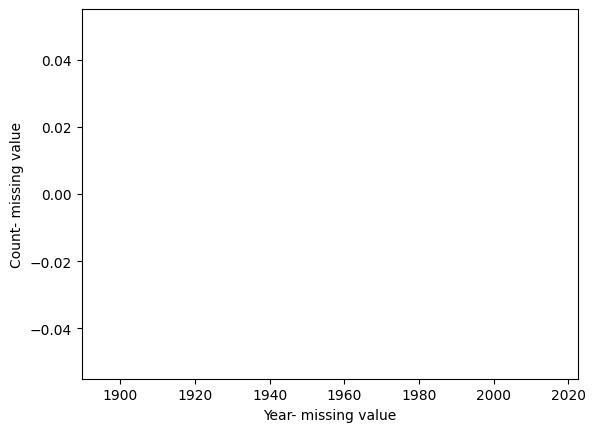

In [ ]:
# 각 행의 결측치 수를 확인하고 'miss_data' 열로 추가
df_mg["miss_data"] = df_mg.isnull().sum(axis=1)

# 년도별 결측치 총합 계산 후 내림차순 정렬
n_miss_data = df_mg.groupby('Year')['miss_data'].sum().sort_values(ascending=False)

# 시각화
plt.bar(n_miss_data.index, n_miss_data.values)
plt.xlabel('Year- missing value')
plt.ylabel('Count- missing value')
plt.show()

# > 년도별 Age,Height,Weight 분포도 시각화

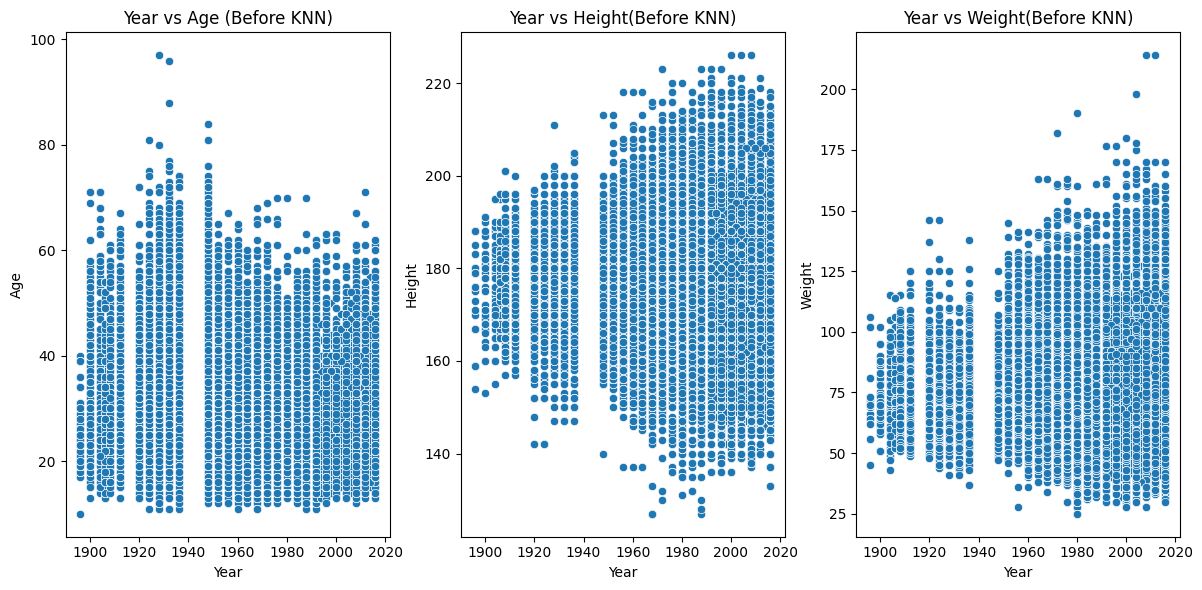

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# KNN 적용 전 분포도 시각화
plt.figure(figsize=(12, 6))

# Age vs Year 분포도
plt.subplot(1, 3, 1)
sns.scatterplot(x='Year', y='Age',  data=df_mg)
plt.title('Year vs Age (Before KNN)')

# Height vs Year 분포도
plt.subplot(1, 3, 2)
sns.scatterplot(x='Year', y='Height', data=df_mg)
plt.title('Year vs Height(Before KNN)')

# Weight vs Year 분포도
plt.subplot(1, 3, 3)
sns.scatterplot(x='Year', y='Weight', data=df_mg)
plt.title('Year vs Weight(Before KNN)')

plt.tight_layout()
plt.show()

# KNN모델 반영 전 결측치 추적
df_mg['Age_was_missing'] = df_mg['Age'].isnull()
df_mg['Height_was_missing'] = df_mg['Height'].isnull()
df_mg['Weight_was_missing'] = df_mg['Weight'].isnull()

# > 결측치 최종 KNN 적용(Age,Height,Weight 및 수치형변환)

In [ ]:
# KNN Imputer 적용 코드
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

# 'NOC' 열과 'Sport' 열을 Label Encoding으로 수치형 변환
le_noc = LabelEncoder()
df_mg['NOC_encoded'] = le_noc.fit_transform(df_mg['NOC'])

le_sport = LabelEncoder()
df_mg['Sport_encoded'] = le_sport.fit_transform(df_mg['Sport'])

# KNN을 적용할 열 목록 (국가와 종목 포함)
columns_to_impute = ['Age', 'Height', 'Weight', 'Sport_encoded', 'NOC_encoded']

# StandardScaler를 사용하여 데이터 스케일링
scaler = StandardScaler()
df_mg[columns_to_impute] = scaler.fit_transform(df_mg[columns_to_impute])

# KNNImputer로 결측치 대체
imputer = KNNImputer(n_neighbors=10)
df_mg[columns_to_impute] = imputer.fit_transform(df_mg[columns_to_impute])

# 스케일링을 원래대로 되돌림
df_mg[columns_to_impute] = scaler.inverse_transform(df_mg[columns_to_impute])

# 결측치가 잘 채워졌는지 확인
print(df_mg.isnull().sum())
columns_to_impute = ['Age', 'Height', 'Weight']
imputer = KNNImputer(n_neighbors=10)
df_mg[columns_to_impute] = imputer.fit_transform(df_mg[columns_to_impute])


ID                         0
Name                       0
Sex                        0
Age                        0
Height                     0
Weight                     0
Team                       0
NOC                        0
Games                      0
Year                       0
Season                     0
City                       0
Sport                      0
Event                      0
Medal                 229959
Medal_gb                   0
Medal_cnt                  0
region                     0
notes                      0
miss_data                  0
Age_was_missing            0
Height_was_missing         0
Weight_was_missing         0
NOC_encoded                0
Sport_encoded              0
dtype: int64


# > KNN적용후 분포도 시각화

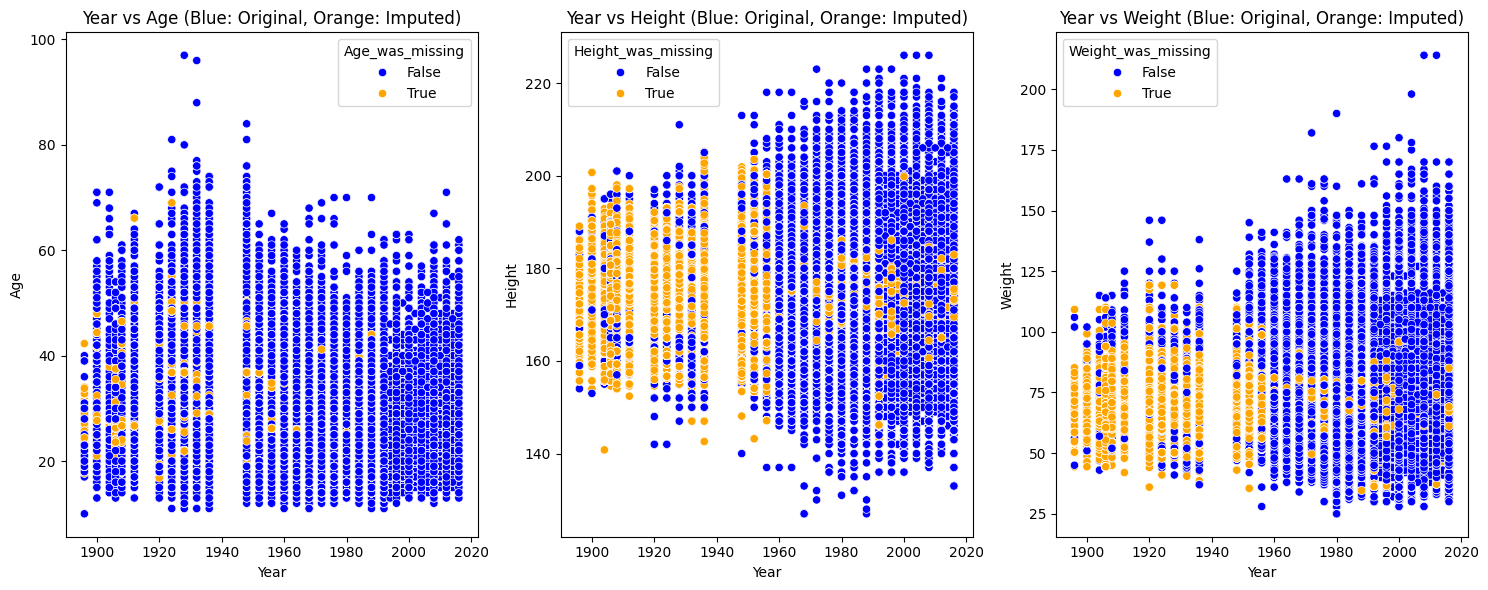

In [ ]:
# KNN 적용 후 분포도 시각화
plt.figure(figsize=(15, 6))

# Age vs Year 분포도 (KNN 적용 후, 결측치 채워진 부분 추적)
plt.subplot(1, 3, 1)
sns.scatterplot(x='Year', y='Age', data=df_mg, hue='Age_was_missing', palette={True: 'orange', False: 'blue'}) #누락된결측치값:orange로 표시
plt.title('Year vs Age (Blue: Original, Orange: Imputed)') #Orange: 결측치변경한값

# Height vs Year 분포도
plt.subplot(1, 3, 2)
sns.scatterplot(x='Year', y='Height', data=df_mg, hue='Height_was_missing', palette={True: 'orange', False: 'blue'})
plt.title('Year vs Height (Blue: Original, Orange: Imputed)')

# Weight vs Year 분포도
plt.subplot(1, 3, 3)
sns.scatterplot(x='Year', y='Weight', data=df_mg, hue='Weight_was_missing', palette={True: 'orange', False: 'blue'})
plt.title('Year vs Weight (Blue: Original, Orange: Imputed)')

plt.tight_layout()
plt.show()

In [ ]:
# 데이터 프레임 저장
df_mg.to_csv('/content/drive/MyDrive/Colab Notebooks/Data/cleaned_all_data_1005.csv', index=False)

# -> 대한민국 set 생성

In [ ]:
"""
- 대한민국 자료중 나이,몸무게,키 결측치가 있는건이 있는지 확인
- 대한민국 자료중 종목기준으로 현재 메달정보 체크
- 세계종목, 한국종목 비교후 아직 소외된종목 확인 , 노메달인 대상 종목추리기
- 최근 메달의 추이를확인
- 종목간 성별,나이,키등 신체적인 조건 확인
-
"""

'\n- 대한민국 자료중 나이,몸무게,키 결측치가 있는건이 있는지 확인\n- 대한민국 자료중 종목기준으로 현재 메달정보 체크\n- 세계종목, 한국종목 비교후 아직 소외된종목 확인 , 노메달인 대상 종목추리기\n- 최근 메달의 추이를확인 \n- 종목간 성별,나이,키등 신체적인 조건 확인\n- \n'

In [ ]:
#대한민국 건수 noc = kor
len(df[df['NOC'] == 'KOR'])  #전체건수 : 4464

4464

In [ ]:
#대한민국 자료만 추려서 자료확인필요
df_kor = pd.DataFrame(df[df['NOC'] == 'KOR'])
len(df_kor)

4464

In [ ]:
#결측치 확인
df_kor.isnull().sum() #대한민국 자료로 결측치가 있는 행갯수

ID              0
Name            0
Sex             0
Age            54
Height        579
Weight        577
Team            0
NOC             0
Games           0
Year            0
Season          0
City            0
Sport           0
Event           0
Medal        3826
Medal_gb        0
Medal_cnt       0
dtype: int64

In [ ]:
#Age 결측치 자료확인
df_kor[df_kor['Age'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_gb,Medal_cnt
6370,3571,An Byeong-Seok,M,NaN,180.0,NaN,South Korea,KOR,1948 Summer,1948,Summer,London,Basketball,Basketball Men's Basketball,NaN,0,0
6371,3571,An Byeong-Seok,M,NaN,180.0,NaN,South Korea,KOR,1956 Summer,1956,Summer,Melbourne,Basketball,Basketball Men's Basketball,NaN,0,0
6430,3607,An Yeong-Sik,M,NaN,NaN,NaN,South Korea,KOR,1956 Summer,1956,Summer,Melbourne,Basketball,Basketball Men's Basketball,NaN,0,0
12370,6716,Bae Jeong-Ho,M,NaN,NaN,NaN,South Korea,KOR,1948 Summer,1948,Summer,London,Football,Football Men's Football,NaN,0,0
12392,6730,Baek Jeong-Nam,M,NaN,NaN,NaN,South Korea,KOR,1956 Summer,1956,Summer,Melbourne,Basketball,Basketball Men's Basketball,NaN,0,0
13856,7505,Bang Won-Sun,M,NaN,NaN,NaN,South Korea,KOR,1948 Summer,1948,Summer,London,Basketball,Basketball Men's Basketball,NaN,0,0
40759,21011,Choi Hang-Gi,M,NaN,NaN,59.0,South Korea,KOR,1948 Summer,1948,Summer,London,Weightlifting,Weightlifting Men's Featherweight,NaN,0,0
40809,21026,Choi Jeong-Hyeok,M,NaN,163.0,63.0,South Korea,KOR,1968 Summer,1968,Summer,Mexico City,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,0,0
40883,21060,Choi Seong-Gon,M,NaN,NaN,NaN,South Korea,KOR,1948 Summer,1948,Summer,London,Football,Football Men's Football,NaN,0,0
40901,21072,Choi Tae-Gon,M,NaN,NaN,NaN,South Korea,KOR,1956 Summer,1956,Summer,Melbourne,Basketball,Basketball Men's Basketball,NaN,0,0


In [ ]:
df_kor[df_kor['Age'].isnull()].value_counts(subset=['Year'], normalize=False, sort=False, ascending=True, dropna=False)

Year
1948    24
1952     3
1956    17
1960     8
1968     2
dtype: int64

In [ ]:
#그냥 평군값으로 해도 무방할듯
df_kor.describe()

,ID,Age,Height,Weight,Year,Medal_gb,Medal_cnt
count,4464.000000,4410.000000,3885.000000,3887.000000,4464.000000,4464.000000,4464.000000
mean,66570.174059,23.102494,171.992278,66.810651,1994.295699,0.277778,0.142921
std,29224.873572,4.384752,9.166440,12.499971,15.850987,0.743868,0.350032
min,1422.000000,13.000000,139.000000,33.000000,1948.000000,0.000000,0.000000
25%,53656.750000,20.000000,165.000000,58.000000,1988.000000,0.000000,0.000000
50%,60160.500000,23.000000,172.000000,65.000000,1996.000000,0.000000,0.000000
75%,83961.250000,26.000000,178.000000,74.000000,2008.000000,0.000000,0.000000
max,133499.000000,48.000000,207.000000,158.000000,2016.000000,3.000000,1.000000
